# Assignment 3: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [0]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# Your code goes here for this section.
housing = pd.read_csv("housing.csv")

In [0]:
housing = housing.drop(['ocean_proximity', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value'], axis=1)
# k-means only works with quantitative variables

In [0]:
housing.head(5)

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [0]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

num_attribs = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
cat_attribs = []

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [0]:
# housing_prepared.max(axis=0)
housing_prepared = housing.to_numpy()
housing_prepared[0]

array([-122.23,   37.88])

In [0]:
import random
import math

# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(data, k = 2, p = 2):
  rows = data.shape[0]
  features = data.shape[1]
  centers = []
  for i in range(k):
    centers.append([])
  maxes = data.max(axis=0)
  mins = data.min(axis=0)
  # randomly assign initial cluster centers
  for i in range(k):
    center_list = centers[i]
    for j in range(features):
      max_j = math.floor(maxes[j])
      min_j = math.floor(mins[j])
      center_list.append(random.randint(min_j, max_j))
    centers[i] = center_list
  # fit centers
  data_clusters = np.zeros(shape=rows) # holds current cluster assignments
  old_clusters = np.zeros(shape=rows) # holds cluster assignments from previous iteration
  goOn = True
  round = 0
  while goOn:
    print("round: ", round)
    round += 1
    data_clusters = np.zeros(shape=rows)
    for i in range(rows):
      row_i = data[i] # subset by row of df
      dist_from_centers = []
      for j in range(k):
        sum_dist = 0.0
        for l in range(features):
          # calcualte distance from each center
          row_i_l = row_i[l]
          cl_j_l = centers[j][l]
          sum_dist += (row_i_l - cl_j_l)**p
        root_sum = (sum_dist)**(1/p)
        dist_from_centers.append(root_sum)
      data_clusters[i] = dist_from_centers.index(min(dist_from_centers))
    print(data_clusters)
    if np.array_equal(data_clusters, old_clusters):
      goOn = False
    else:
      old_clusters = data_clusters
      # re-center cluster centers
      for i in range(k):
        ind_list = [r for r, value in enumerate(data_clusters) if value == i]
        k_sub_df = np.zeros(shape=(len(ind_list), features))
        count = 0
        for y in range(rows):
          if y in ind_list:
            k_sub_df[count] = data[y]
            count += 1
        centers[i] = k_sub_df.mean(axis=0)
  return centers

- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Change k from 2 to 10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


round:  0
[1. 1. 1. ... 1. 1. 1.]
round:  1
[1. 1. 1. ... 1. 1. 1.]
round:  2
[1. 1. 1. ... 1. 1. 1.]
round:  3
[1. 1. 1. ... 1. 1. 1.]
round:  4
[1. 1. 1. ... 1. 1. 1.]
round:  5
[1. 1. 1. ... 1. 1. 1.]
round:  6
[1. 1. 1. ... 1. 1. 1.]
SSE:  17857.187283260057
Cluster  0  means for long and lat:  [-118.00729556   33.94057002]
Cluster  1  means for long and lat:  [-121.71696077   37.9562441 ]


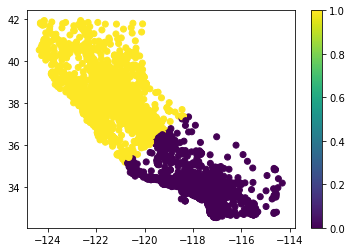

In [0]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline
random.seed(4)
cluster_means = kmeans(housing_prepared)
rows = housing_prepared.shape[0]
features = housing_prepared.shape[1]
data_clusters = np.zeros(shape=rows)
sse = 0.0
for i in range(rows):
  row_i = housing_prepared[i] # subset by row of df
  dist_from_centers = []
  for j in range(2):
    sum_dist = 0.0
    for l in range(features):
      # calcualte distance from each center
      sum_dist += (row_i[l] - cluster_means[j][l])**2
    root_sum = (sum_dist)**(1/2)
    dist_from_centers.append(root_sum)
  sse += min(dist_from_centers)
  data_clusters[i] = dist_from_centers.index(min(dist_from_centers))

x = []
y = []
for i in range(rows):
  x.append(housing.iloc[i][0])
  y.append(housing.iloc[i][1])
sc = plt.scatter(x, y, c=data_clusters)
plt.colorbar(sc)
plt.plot()

print("SSE: ", sse)
for i in range(2):
  print("Cluster ", i, " means for long and lat: ", cluster_means[i])

# The cluster means for cluster 0 indicate that there are a lot of homes in Los 
# Angeles and the cluster means for cluster 1 indicate that there are a lot of
# homes in San Francisco. 

round:  0
[1. 1. 1. ... 1. 1. 1.]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


round:  1
[0. 0. 0. ... 7. 7. 7.]
round:  2
[0. 0. 0. ... 7. 7. 7.]
round:  3
[0. 0. 0. ... 7. 7. 7.]
round:  4
[0. 0. 0. ... 7. 7. 7.]
round:  5
[0. 0. 0. ... 7. 7. 7.]
round:  6
[0. 0. 0. ... 7. 7. 7.]
round:  7
[0. 0. 0. ... 7. 7. 7.]
round:  8
[0. 0. 0. ... 7. 7. 7.]
round:  9
[0. 0. 0. ... 7. 7. 7.]
round:  10
[0. 0. 0. ... 7. 7. 7.]
round:  11
[0. 0. 0. ... 7. 7. 7.]
round:  12
[0. 0. 0. ... 7. 7. 7.]
round:  13
[0. 0. 0. ... 7. 7. 7.]
round:  14
[0. 0. 0. ... 7. 7. 7.]
SSE:  10267.156574377657


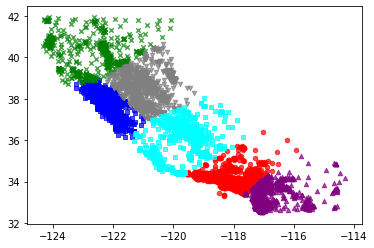

In [0]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
%matplotlib inline
random.seed(4)
cluster_means = kmeans(housing_prepared, k=10)
rows = housing_prepared.shape[0]
features = housing_prepared.shape[1]
data_clusters = np.zeros(shape=rows)
sse = 0.0
for i in range(rows):
  row_i = housing_prepared[i] # subset by row of df
  dist_from_centers = []
  for j in range(10):
    sum_dist = 0.0
    for l in range(features):
      # calcualte distance from each center
      sum_dist += (row_i[l] - cluster_means[j][l])**2
    root_sum = (sum_dist)**(1/2)
    dist_from_centers.append(root_sum)
  sse += min(dist_from_centers)
  data_clusters[i] = str(dist_from_centers.index(min(dist_from_centers)))

x = []
y = []
for i in range(rows):
  x.append(housing.iloc[i][0])
  y.append(housing.iloc[i][1])
from mlxtend.plotting import category_scatter
final_data = {"x":x, "y":y, "colors":data_clusters}
final_df = pd.DataFrame(final_data)

fig = category_scatter(x="x", y="y", label_col="colors", data = final_df, legend_loc=False)

print("SSE: ", sse)

# Northern California is grouped into it's own cluster. San Francisco/Oakland 
# looks to claim it's own cluster. Los Angeles/Palm Springs seems to warrant 
# it's own cluster as well. Southern California south of LA gets it's own 
# cluster too. 